In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.lines as mlines
sns.set(style="whitegrid")

# Set the font family to Times New Roman

df_imagenet = pd.read_csv('../../calibration-study/ImageNet_sss.csv')
df_cifar10 = pd.read_csv('../../calibration-study/cifar10_sss.csv')
df_cifar100 = pd.read_csv('../../calibration-study/cifar100_sss.csv')


# Architecture list
list_arch = ['8:8:8:8:8','16:16:16:16:16','24:24:24:24:24','32:32:32:32:32','40:40:40:40:40',
             '48:48:48:48:48','56:56:56:56:56','64:64:64:64:64']


In [3]:

# Create a new column for the size of the architecture
def arch_to_size(arch):
    return sum(int(x) for x in arch.split(':'))

# Apply the architecture size and filter to the dataframes
df_imagenet = df_imagenet[df_imagenet['arch'].isin(list_arch)]
df_imagenet['size'] = df_imagenet['arch'].apply(arch_to_size)

df_cifar10 = df_cifar10[df_cifar10['arch'].isin(list_arch)]
df_cifar10['size'] = df_cifar10['arch'].apply(arch_to_size)

df_cifar100 = df_cifar100[df_cifar100['arch'].isin(list_arch)]
df_cifar100['size'] = df_cifar100['arch'].apply(arch_to_size)


# Define color palettes
palette_orig = sns.color_palette("crest", len(list_arch))
palette_post = sns.color_palette("flare", len(list_arch))


# Define color mapping
def arch_to_color(arch):
    return list_arch.index(arch) if arch in list_arch else None




*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

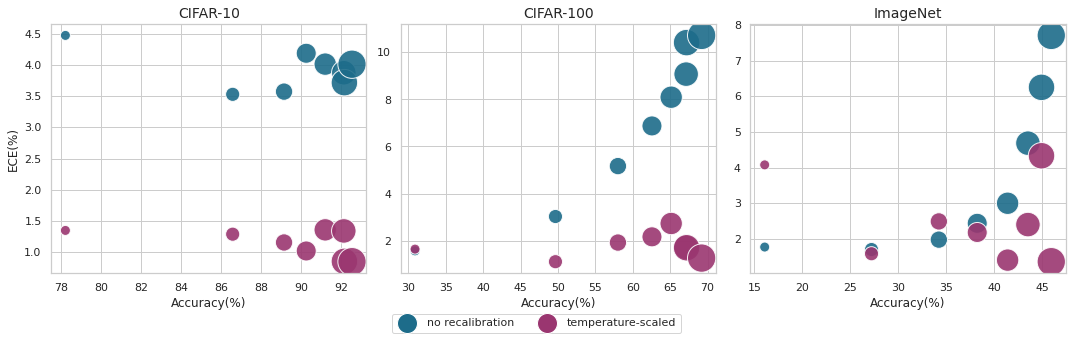

In [4]:
arch_to_dot_size = {'8:8:8:8:8': 100, '16:16:16:16:16': 200, '24:24:24:24:24': 300, 
                    '32:32:32:32:32': 400, '40:40:40:40:40': 500, '48:48:48:48:48': 600, 
                    '56:56:56:56:56': 700, '64:64:64:64:64': 800}
df_imagenet['dot_size'] = df_imagenet['arch'].map(arch_to_dot_size)
df_cifar10['dot_size'] = df_cifar10['arch'].map(arch_to_dot_size)
df_cifar100['dot_size'] = df_cifar100['arch'].map(arch_to_dot_size)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


datasets = [
            (df_cifar10, df_cifar10, 'CIFAR-10'), 
            (df_cifar100, df_cifar100, 'CIFAR-100'),(df_imagenet, df_imagenet, 'ImageNet')]

size_to_label = {sum(int(x) for x in arch.split(':')): arch.split(':')[0] for arch in list_arch}

for i, (df, df_post, label) in enumerate(datasets):
    # colors_orig = df['arch'].apply(arch_to_color).apply(lambda x: palette_orig[x])
    # colors_post = df_post['arch'].apply(arch_to_color).apply(lambda x: palette_post[x])

    colors_orig = palette_orig[5]
    colors_post = palette_post[5]

    axs[i].scatter(df['acc']*100, df['pre_ECE_15']*100, s=df['dot_size'], c=colors_orig, alpha=0.9, edgecolors='w')
    axs[i].scatter(df_post['acc']*100, df_post['post_ECE_15']*100, s=df_post['dot_size'], c=colors_post, alpha=0.9, edgecolors='w')
    axs[i].set_title(label, fontsize=14)
    axs[i].set_ylabel('ECE(%)') if i == 0 else None
    axs[i].set_xlabel('Accuracy(%)')


# Adjust layout
# Add legend
legend_labels = ['no recalibration', 'temperature-scaled']
legend_colors = [palette_orig[5], palette_post[5]]
legend_elements = [mlines.Line2D([], [], marker='o', color='w', label=label, markerfacecolor=color, markersize=20) for label, color in zip(legend_labels, legend_colors)]
legend = fig.legend(handles=legend_elements, loc='lower center', ncol=len(legend_labels), bbox_to_anchor=(0.5, 0.05))

# Adjust subplots layout
fig.tight_layout(rect=[0, 0.1, 1, 1])
# plt.savefig("fig/sss_sizeplot.pdf", dpi=300, format='pdf', bbox_inches='tight')
